In [1]:
from fastai.vision.all import *
import fastai
import fastcore

In [137]:
import matplotlib.pyplot as plt

In [2]:
path = untar_data(URLs.IMAGENETTE, archive='D:\FastAi_Data')

In [198]:
dblock = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items= get_image_files,
    get_y = parent_label,
    item_tfms= Resize(460),
    batch_tfms= aug_transforms(size=224, min_scale=0.75))
dls = dblock.dataloaders(path,bs=64)

In [24]:
ds  = dblock.datasets(path)

In [152]:
len(ds.train),len(ds.valid)

(10716, 2678)

In [175]:
im = ds.train[1000]

In [176]:
ds.vocab[im[1]]

'n03888257'

In [32]:
from PIL import Image

In [177]:
def show_custom_image_mit_target(idx=7):
    img = ds.train[idx]
    im_target = ds.vocab[img[1]]
    return img[0], im_target

In [253]:
im,tar = show_custom_image_mit_target(127)

In [184]:
width, height = im.size

In [205]:
left = width-164
top = height-164
right = width
bottom = height

In [245]:
## Cropping out top-right, top-left, bottom-right, bottom-left
tl = im.crop((0, 0, 164, 164)) ## left top right bottom
tr = im.crop((left, 0, right, 164))
bl = im.crop((0, top, 164,bottom))
br = im.crop((left, top, right,bottom))
## Center Crop 
center = im.crop((250-82, height/2 - 82 , 250+82, height/2 + 82 ))

Text(0.5, 0.98, 'n02102040')

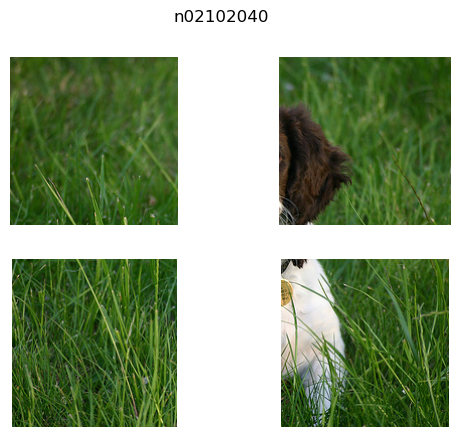

In [246]:
fig, axes = plt.subplots(2, 2)
## Display image in left subplot
axes[0][0].imshow(tl)
axes[0][0].axis('off')

# Display the second image on the right subplot
axes[0][1].imshow(tr)
axes[0][1].axis('off')

# Display image in bottom left subplot
axes[1][0].imshow(bl)
axes[1][0].axis('off')

#Display image in bottom right
axes[1][1].imshow(br)
axes[1][1].axis('off')
fig.suptitle(tar)

In [247]:
## Center Crop 
center = im.crop(((width/2)-82, height/2 - 82, (width/2)+82, height/2 + 82))

In [248]:
center.size

(164, 164)

In [255]:
## Creating a Crop function
def crops_transform(img, size=164):
    width,height = img.width,img.height
    
    left = width-size
    top = height-size
    right = width
    bottom = height
    
    ## Cropping out top-right, top-left, bottom-right, bottom-left
    tl = TensorImage(im.crop((0, 0, size, size))) ## left top right bottom
    tr = TensorImage(im.crop((left, 0, right, size)))
    bl = TensorImage(im.crop((0, top, size,bottom)))
    br = TensorImage(im.crop((left, top, right,bottom)))
    ## Center Crop 
    center = TensorImage(im.crop(((width/2)-size/2, height/2 - size/2,
                      (width/2)+size/2, height/2 + size/2 )))
    return torch.stack([tl,tr,center,br,bl])

In [256]:
imgs = crops_transform(im)

Text(0.5, 0.98, 'n02979186')

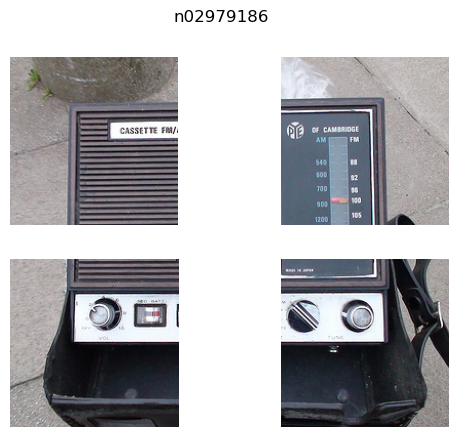

In [258]:
## Testing wether or not Crop_Transform is working or not
fig, axes = plt.subplots(2, 2)
## Display image in left subplot
axes[0][0].imshow(imgs[0])
axes[0][0].axis('off')

# Display the second image on the right subplot
axes[0][1].imshow(imgs[1])
axes[0][1].axis('off')

# Display image in bottom left subplot
axes[1][0].imshow(imgs[4])
axes[1][0].axis('off')

#Display image in bottom right
axes[1][1].imshow(imgs[3])
axes[1][1].axis('off')
fig.suptitle(tar)

In [261]:
imgs[2].size()

torch.Size([164, 164, 3])

In [290]:
class CornerAndCenterCrop(Transform):
    def __init__(self, size, corner = 0, **kwargs):
        self.size = size
        self.corner = corner
    
    def encodes(self, x:(Image.Image,TensorBBox,TensorPoint)):
        self.w, self.h = x.size
        
        left = self.w- self.size
        top = self.h- self.size
        right = self.w
        bottom = self.h
        
        self.crops = [
            x.crop((0, 0, self.size, self.size)), ## top-left
            x.crop((left, 0, right, self.size)), ## top-right
            x.crop((0, top, self.size,bottom)), ## bottom-left
            x.crop((left, top, right,bottom)), ## bottom-right
            x.crop(((self.w/2)-self.size/2, self.h/2 - self.size/2,   ## Center
                      (self.w/2)+self.size/2, self.h/2 + self.size/2 )),
        ]
        
        return self.crops[self.corner]

In [335]:
dblock_test = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    item_tfms= CornerAndCenterCrop(164,0)
)

dls_test = dblock_test.dataloaders(path,bs=64)

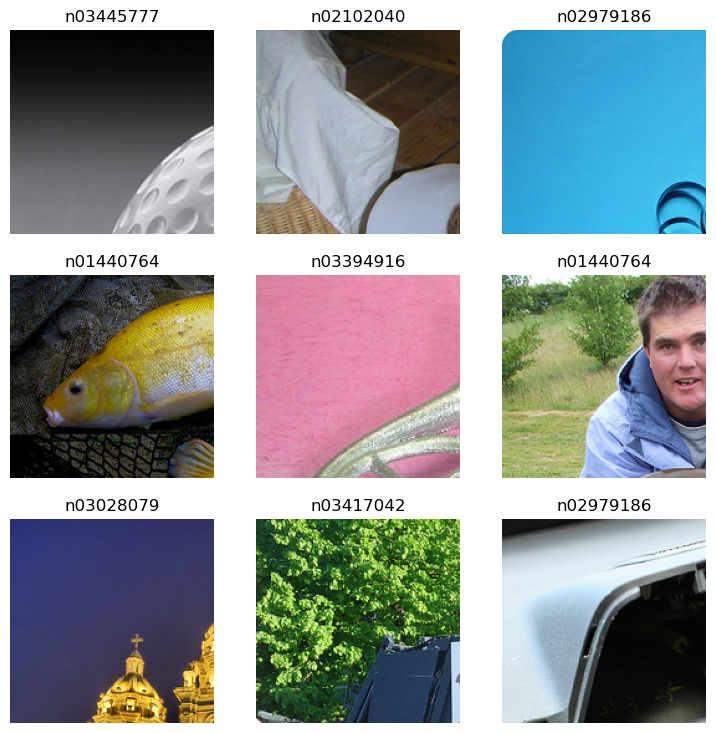

In [336]:
dls_test.show_batch()

(600, 450)